<a href="https://colab.research.google.com/github/ijoonc/Krauss-Lab-Tribology-Image-Processing-Simulator/blob/main/Krauss_Lab_Tribology_Machine_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the Machine Learning Model for Tribology Research 2023.

### Let's Convert Particle Images using Otsu's Binary Threshold.

Thresholding Algorithm: https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Watershed_Algorithm_Marker_Based_Segmentation.php

In [ ]:
# First install OpenCV if not previously installed on computer
!pip3 install opencv-python

# Install ImageIO for image processing
!pip3 install imageio

# Download Rolling Ball for T=thresholding sequence
!pip install opencv-rolling-ball

# Download split-image just in case we need to split images
!pip install split-image

# PyBasics is a shading correction Python 
# !pip install pybasics

In [ ]:
# Gain access to the Krauss Tribology Lab Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Change working directory
%cd '/content/gdrive/Shareddrives/Krauss Tribology Research/Fall 2022 - Spring 2023/Pictures/Encoded Pictures'

In [ ]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
import skimage.color
import skimage.filters
import os

import cv2
from PIL import Image
import numpy as np
from cv2_rolling_ball import subtract_background_rolling_ball
from google.colab.patches import cv2_imshow

In [ ]:
# Check current list of items in the directory.
%ls

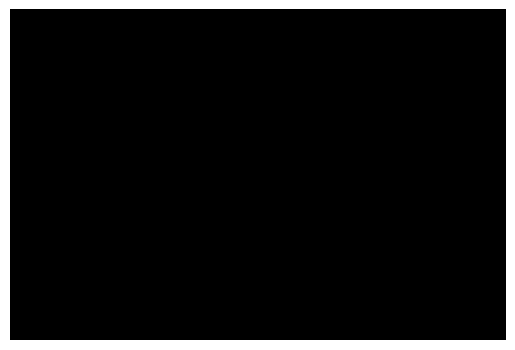

In [ ]:
# Let's create a Black Background

import cv2

# Define the dimensions of the image
width = 1359
height = 906

# Create a black image with the desired dimensions
img = np.zeros((height, width, 3), dtype=np.uint8)
img.fill(0)

# Display the image
plt.axis('off')
plt.imshow(img)

# Save black background into Google Drive
cv2.imwrite("black-background.jpg", img)

plt.show()

In [ ]:
# Change directory to the particle training images
%cd ..
%cd 9-26-2022

# Make sure we are in the correct directory (containing %s of additive)
%ls

### Note: At this time, the shading correction algorithm below does NOT work with our Thresholding algorithm. Rolling ball subtraction and CLAHE are not sufficient enough to evenly shade the background of particle images.

### We should work towards finding a better, more optimal solution for the shading corrector. Alternatively, we can manually download the particle images, and apply the shading correction using ImageJ. However, we would like to avoid this manual process because it is very tedious and time-consuming.

In [ ]:
# Let us start off with the 2% Hitec concentration!
%cd '2%'


# Load the image
img = cv2.imread('img1.jpg')              # Can later automate this for ALL images in the folder
cv2_imshow(img)

# Display correctly colored images; useful for visualization later on
b, g, r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

# Load the image again, but this time in grayscale
img = cv2.imread('img1.jpg', 0)
cv2_imshow(img)

# Set the radius for rolling ball subtraction --> shading correction
radius = 50
final_img, background = subtract_background_rolling_ball(img, radius, light_background = True, 
                                                         use_paraboloid = False, do_presmooth = True)

cv2_imshow(final_img)
cv2_imshow(background)

# Add contrast filter using CLAHE for better visualization
clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize = (8, 8))
clahe_img = clahe.apply(final_img)
cv2_imshow(clahe_img)

# Threshold the Image
ret, thresh = cv2.threshold(final_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Portray the resulting image
plt.subplot(121), plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(thresh, 'gray')
plt.title("Otus's Binary Threshold"), plt.xticks([]), plt.yticks([])


plt.show()

### Below is the code for the ENTIRE shading correction + thresholding sequence for one particle image.

In [ ]:
# Let us continue using the 2% Hitec particle images.
%cd '2%'

# Load the image
img = cv2.imread('2% Dispersant Additive Example w/ No Shading Correction.jpg')

# Display original and corrected images
cv2_imshow(img)
b, g, r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

# Grayscale the Image
img = cv2.imread('2% Dispersant Additive Example w/ No Shading Correction.jpg', 0)
cv2_imshow(img)

# Apply rolling ball subtraction
radius = 50
final_img, background = subtract_background_rolling_ball(img, radius, light_background = True,
                                                         use_paraboloid = False, do_presmooth = True)

### Note: there is no CLAHE in this run ###

# Threshold the Image
ret, thresh = cv2.threshold(final_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Portray the resulting image
plt.subplot(121), plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(thresh, 'gray')
plt.title("Otus's Binary Threshold"), plt.xticks([]), plt.yticks([])

plt.show()               


# Noise removal using morphologyEx() --> we can switch between opening and closing to see which one is better
kernel = np.ones((2, 2), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 2)

# Display the images again
plt.subplot(131), plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(thresh, 'gray')
plt.title("Otus's Binary Threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(closing, 'gray')
plt.title("morphologyEx"), plt.xticks([]), plt.yticks([])

plt.show()


# Dilate our image so that thresholding is much easier to visualize (for ourselves and the computer)
# Dilate with respect to the background
bg = cv2.dilate(opening, kernel, iterations = 3)

# Show the images again
plt.subplot(221), plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(thresh, 'gray')
plt.title("Otus's Binary Threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.show()


# Apply distance thresholding to increase accuracy for overall threshold
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)

# Overall Threshold
ret, fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)

# Display the images again
plt.subplot(321), plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(322), plt.imshow(thresh, 'gray')
plt.title("Otsu's Binary Threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(323), plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])

plt.subplot(324), plt.imshow(bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.subplot(325), plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])

plt.subplot(326), plt.imshow(fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

plt.tight_layout()

# Save the current 6 images into Google Drive
# plt.savefig('images.png',
#             bbox_inches='tight',
#             pad_inches=0,
#             format='png',
#             dpi=300)

plt.show()


# Remove the axes and white border
plt.axis('off')
fig = plt.imshow(fg, cmap="gray", interpolation='nearest')

fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

# Set directory to Thresholded Images folder
%cd ..
%cd .. 
%cd 'Encoded Pictures/Thresholded Images'

# Save the image
plt.savefig(f'threshold_image1.png',
            bbox_inches='tight',
            pad_inches=0,
            format='png',
            dpi=300)

plt.show()


# Image Resizing to account for particles along the edges of the image
image = Image.open(f'threshold_image1.png')
print(f"Original size : {image.size}") # 1359x906

img_resized = image.resize((1200, 800))

# Set directory to the Resized Images folder
%cd ..
%cd 'Resized Images'

img_resized.save(f'resized_image1.png')


# Overlay the Shrunken Image on the Black Background
# Opening the primary image (used in background)
%cd ..
img1 = Image.open("black-background.jpg")
  
# Opening the secondary image (overlay image)
%cd 'Resized Images'
img2 = Image.open(f"resized_image1.png")

# Pasting img2 image on top of img1 
# starting at coordinates (0, 0)
img1.paste(img2, (80, 50), mask = img2)
  
# Displaying the image
img1.show()


# Set directory to the Resized Images folder
%cd ..
%cd 'Resulting Images'

# Save the image
img1.save(f"resulting_image1.jpeg", "JPEG")


# Reset Directory for next iteration
%cd ..
%cd ..
%cd '9-26-2022'

### The code cell below contains the thresholding (not shading correction yet) algorithm for ALL images inside a single folder (in this case 2% Hitec).

Source for the algorithm referenced once again: https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Watershed_Algorithm_Marker_Based_Segmentation.php


In [ ]:
# Folder path
dir_path = '2%'
count = 0

# Iterate directory and obtain file count
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)



# Reposition Directory
%cd '2%'

# Thresholding sequence for ALL images in folder
for num in range(1, count + 1):
  img = cv2.imread(f'img{num}.jpg')
  b,g,r = cv2.split(img)
  rgb_img = cv2.merge([r,g,b])

  # Grayscale the Image
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Threshold the Image
  ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # Portray the resulting image
  plt.subplot(121), plt.imshow(rgb_img)
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])

  plt.subplot(122), plt.imshow(thresh, 'gray')
  plt.title("Otus's Binary Threshold"), plt.xticks([]), plt.yticks([])

  plt.show()               


  # Noise removal using morphologyEx() --> we can switch between opening and closing to see which one is better
  kernel = np.ones((2, 2), np.uint8)
  opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
  closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 2)

  # Display the images again
  plt.subplot(131), plt.imshow(rgb_img)
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])

  plt.subplot(132), plt.imshow(thresh, 'gray')
  plt.title("Otus's Binary Threshold"), plt.xticks([]), plt.yticks([])

  plt.subplot(133), plt.imshow(closing, 'gray')
  plt.title("morphologyEx"), plt.xticks([]), plt.yticks([])

  plt.show()


  # Dilate our image so that thresholding is much easier to visualize (for ourselves and the computer)
  # Dilate with respect to the background
  bg = cv2.dilate(opening, kernel, iterations = 3)

  # Show the images again
  plt.subplot(221), plt.imshow(rgb_img)
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])

  plt.subplot(222), plt.imshow(thresh, 'gray')
  plt.title("Otus's Binary Threshold"), plt.xticks([]), plt.yticks([])

  plt.subplot(223), plt.imshow(closing, 'gray')
  plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])

  plt.subplot(224), plt.imshow(bg, 'gray')
  plt.title("Dilation"), plt.xticks([]), plt.yticks([])

  plt.show()


  # Apply distance thresholding to increase accuracy for overall threshold
  dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)

  # Overall Threshold
  ret, fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)

  # Display the images again
  plt.subplot(321), plt.imshow(rgb_img)
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])

  plt.subplot(322), plt.imshow(thresh, 'gray')
  plt.title("Otsu's Binary Threshold"), plt.xticks([]), plt.yticks([])

  plt.subplot(323), plt.imshow(closing, 'gray')
  plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])

  plt.subplot(324), plt.imshow(bg, 'gray')
  plt.title("Dilation"), plt.xticks([]), plt.yticks([])

  plt.subplot(325), plt.imshow(dist_transform, 'gray')
  plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])

  plt.subplot(326), plt.imshow(fg, 'gray')
  plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

  plt.tight_layout()

  # Save the current 6 images into Google Drive
  # plt.savefig('images.png',
  #             bbox_inches='tight',
  #             pad_inches=0,
  #             format='png',
  #             dpi=300)

  plt.show()


  # Remove the axes and white border
  plt.axis('off')
  fig = plt.imshow(fg, cmap="gray", interpolation='nearest')

  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

  # Set directory to Thresholded Images folder
  %cd ..
  %cd .. 
  %cd 'Encoded Pictures/Thresholded Images'

  # Save the image
  plt.savefig(f'threshold_image{num}.png',
              bbox_inches='tight',
              pad_inches=0,
              format='png',
              dpi=300)

  plt.show()


  # Image Resizing to account for particles along the edges of the image
  image = Image.open(f'threshold_image{num}.png')
  print(f"Original size : {image.size}") # 1359x906

  img_resized = image.resize((1200, 800))

  # Set directory to the Resized Images folder
  %cd ..
  %cd 'Resized Images'

  img_resized.save(f'resized_image{num}.png')


  # Overlay the Shrunken Image on the Black Background
  # Opening the primary image (used in background)
  %cd ..
  img1 = Image.open("black-background.jpg")
    
  # Opening the secondary image (overlay image)
  %cd 'Resized Images'
  img2 = Image.open(f"resized_image{num}.png")

  # Pasting img2 image on top of img1 
  # starting at coordinates (0, 0)
  img1.paste(img2, (80, 50), mask = img2)
    
  # Displaying the image
  img1.show()


  # Set directory to the Resized Images folder
  %cd ..
  %cd 'Resulting Images'

  # Save the image
  img1.save(f"resulting_image{num}.jpeg", "JPEG")
  

  # Reset Directory for next iteration
  %cd ..
  %cd ..
  %cd '9-26-2022'